In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
url = 'https://github.com/ronb168/google_store/blob/main/googleplaystore.xlsx?raw=true'
df = pd.read_excel(url)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite ג€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### **Data Cleaning**

In [3]:
df[["Reviews"]] = df[["Reviews"]].astype(float)
df["Installs"] = df["Installs"].astype(str)
df["Price"] = df["Price"].astype(str)
df.dtypes


App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df.Price=df.Price.apply(lambda x: x.strip('$'))
df[["Price"]] = df[["Price"]].astype(float)


In [5]:
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
#df.Installs=df.Installs.replace('Free',np.nan)
df.Installs.value_counts()


1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [6]:
df['Installs'] = pd.to_numeric(df['Installs'])


In [7]:
df.Size=df.Size.str.replace('k','e+3')
df.Size=df.Size.str.replace('M','e+6')

In [8]:
df.Size=df.Size.replace('Varies with device',np.nan)
df.Size=df.Size.replace('1,000+',1000)

In [9]:
df.Size=pd.to_numeric(df.Size)

In [10]:
df.isna().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
df.isna().sum().sum()

3181

מחיקת ריקים

In [12]:
df.dropna(inplace=True)
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### **Define Column Success**

In [14]:
df['Success'] = np.where((df['Installs'] >= 1000000) & (df['Rating'] >= 4),1,0)

### **גרפים טיוטא**

https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store

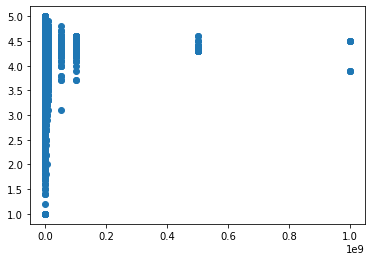

In [15]:

plt.scatter(df.Installs, df.Rating)
plt.show()


In [16]:
df.Rating.describe()

count    7722.000000
mean        4.174022
std         0.544619
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [17]:
#histogram
# plt.figure(figsize=(10,5))
# sns.distplot(df['Installs'],color='g');
# plt.title("Installs")
# plt.show()

In [18]:
# g = sns.catplot(x="Reviews",y="Installs",data=df, kind="box", height = 10 ,palette = "Paired")
# g.despine(left=True)
# g.set_xticklabels(rotation=90)
# g = g.set_ylabels("Installs")
# plt.title('Box plot Reviews VS Installs',size = 20)

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

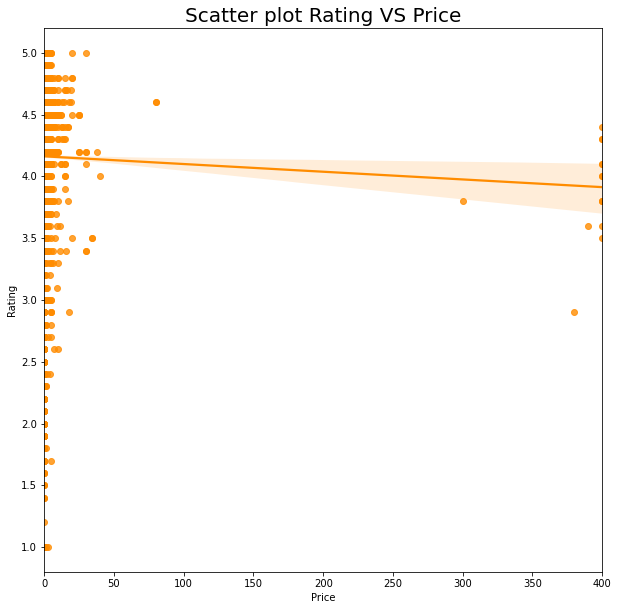

In [19]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)
#Higher price application may make customer disappointed, if they are not good enough.

Text(0.5, 1.0, 'Scatter Plot - Rating VS Installs')

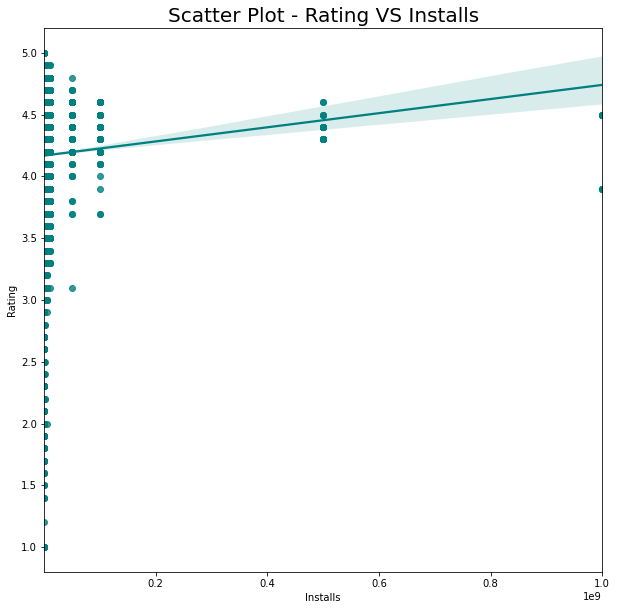

In [20]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df);
plt.title('Scatter Plot - Rating VS Installs',size = 20)
#Seem like number of install affect to rating

Text(0.5, 1.0, 'Rating VS Reveiws')

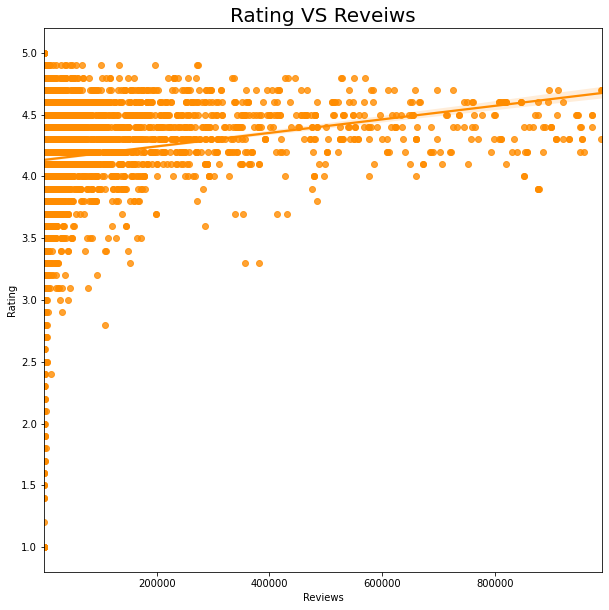

In [21]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews'] < 1000000]);
plt.title('Rating VS Reveiws',size = 20)
#Seem like well-known application will get a good rating

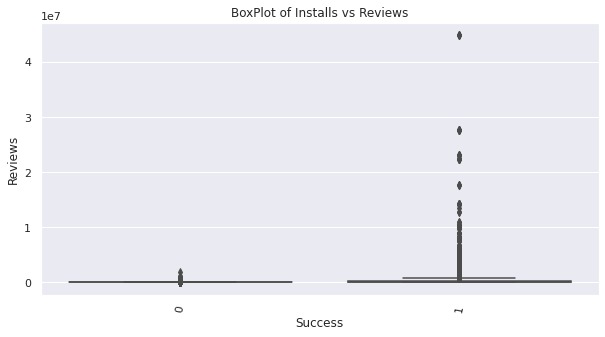

In [22]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(10,5))
sns.set()
sns.boxplot(x="Success", y="Reviews", data=df)
plt.title("BoxPlot of Installs vs Reviews")
plt.xticks(rotation=80)
plt.show()

### **גרפים להצגה**

Text(0.5, 1.0, 'Boxplot of Success VS Size')

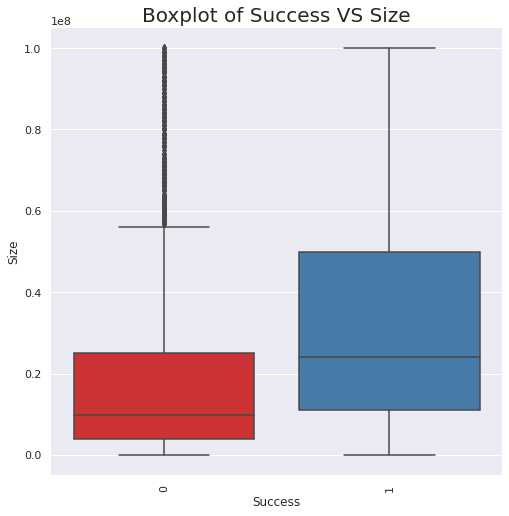

In [25]:
g = sns.catplot(x="Success",y="Size",data=df, kind="box", height = 7 ,palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Size")
plt.title('Boxplot of Success VS Size',size = 20)

Text(0.5, 1.0, 'Barplot - Count of Installs')

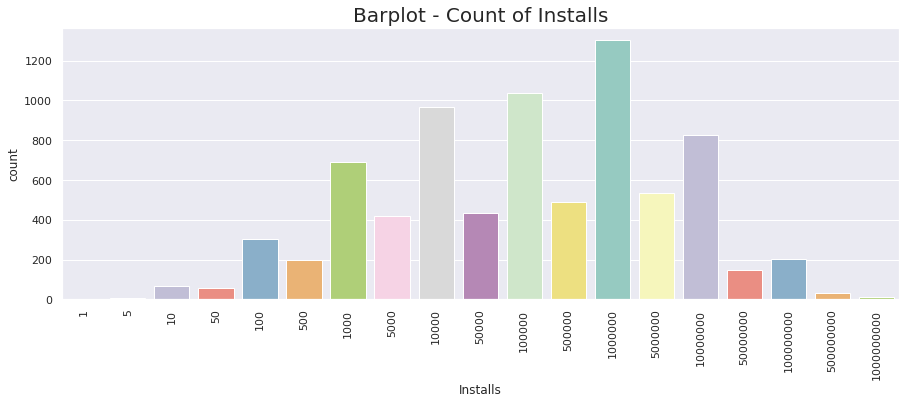

In [ ]:
plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=df, palette="Set3")
plt.title('Barplot - Count of Installs',size = 20)

Text(0.5, 1.0, 'Most Reviewed Apps in Play Store')

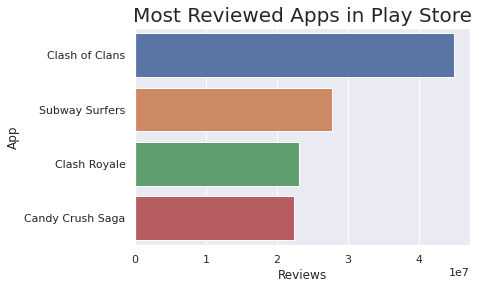

In [ ]:
sorte = df.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = sorte )
ax.set_xlabel('Reviews')
ax.set_title("Most Reviewed Apps in Play Store", size = 20)

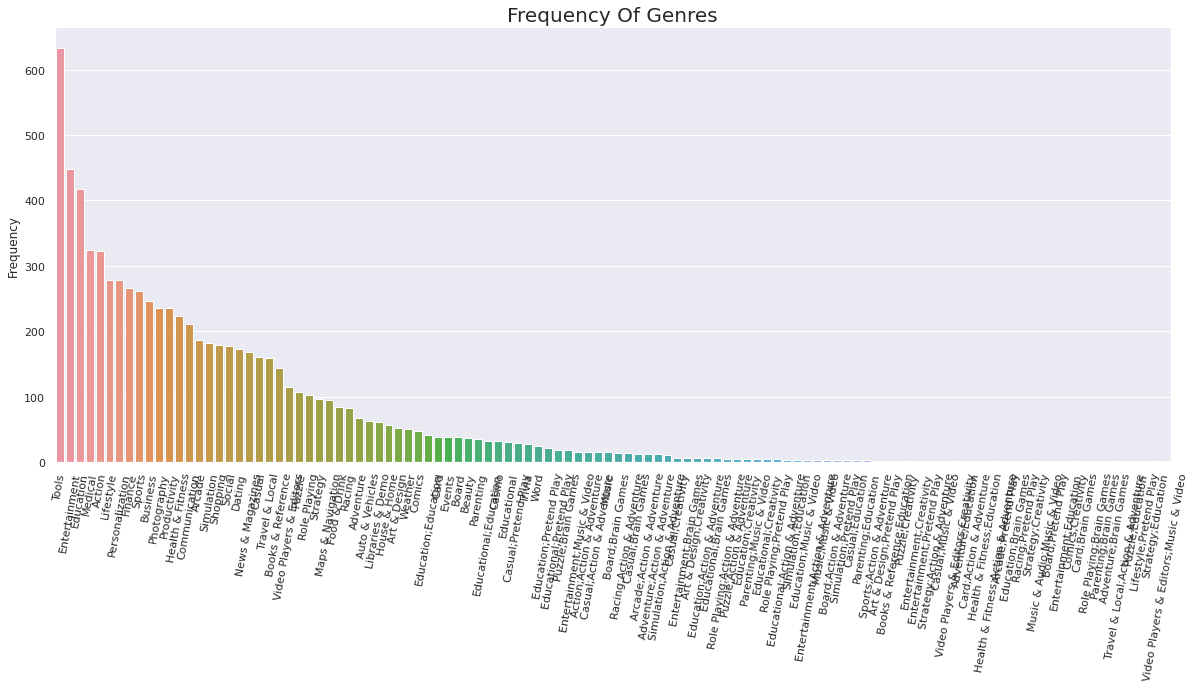

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df.Genres.value_counts().index,y=df.Genres.value_counts())
plt.xticks(rotation=80)
plt.title("Frequency Of Genres", size = 20)
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Rating'].mean()

4.174022274022278

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


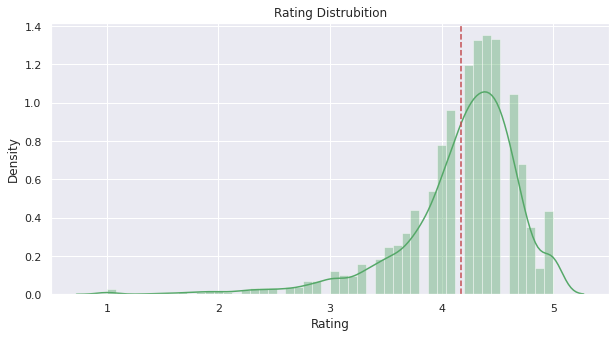

In [ ]:
#histogram
mean = df['Rating'].mean()
plt.figure(figsize=(10,5))
sns.distplot(df['Rating'],color='g')
plt.axvline(mean, color='r', linestyle='--')
plt.title("Rating Distrubition")
plt.show()

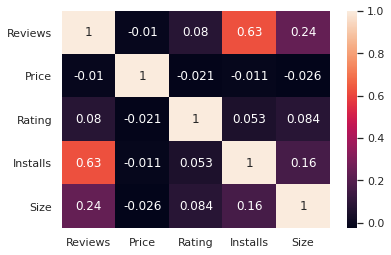

In [ ]:
sns.heatmap(df[["Reviews","Price","Rating","Installs", 'Size']].corr(method='pearson'), annot=True)

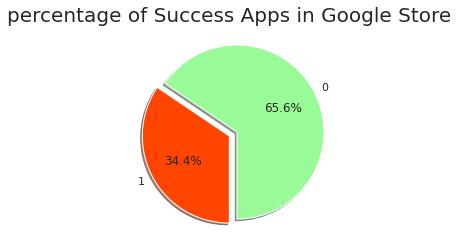

In [ ]:
# Data to plot
labels =df['Success'].value_counts(sort = True).index
sizes = df['Success'].value_counts(sort = True)

colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('percentage of Success Apps in Google Store',size = 20)
plt.show()

### **Binning**

In [ ]:
#cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
#cut_bins = [0, 70000, 100000, 130000, 200000]
#df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

https://pbpython.com/pandas-qcut-cut.html - binning

### **Drop Columns**

In [ ]:
df.drop(['App', 'Installs','Rating','Last Updated','Current Ver','Android Ver','Content Rating', 'Type' , 'Category'],axis = 1, inplace=True)
# We also dropped Installs and Rating because these columns are included in Success 
df

,Reviews,Size,Price,Genres,Success
0,159.0,19000000.0,0.0,Art & Design,0
1,967.0,14000000.0,0.0,Art & Design;Pretend Play,0
2,87510.0,8700000.0,0.0,Art & Design,1
3,215644.0,25000000.0,0.0,Art & Design,1
4,967.0,2800000.0,0.0,Art & Design;Creativity,0
...,...,...,...,...,...
10832,44.0,619000.0,0.0,Books & Reference,0
10833,7.0,2600000.0,0.0,Education,0
10835,38.0,53000000.0,0.0,Education,0
10836,4.0,3600000.0,0.0,Education,0


### **chi2 test**

In [ ]:
chi2_values = []
p_values = []
col = df.drop('Success',axis = 1).columns

for column in col:
      contingency = pd.crosstab(df[column], df['Success'])
      chi2_val, p_value, degrees_of_freedom, expected = chi2_contingency(contingency)
      chi2_values.append(chi2_val)
      p_values.append(round(p_value,5))
    
    
data = list(zip(col, chi2_values, p_values))
data.sort(key = lambda t: t[1],reverse = True)
pd.DataFrame(data = data,columns = ['Variable','Chi squared value','p-value'])


,Variable,Chi squared value,p-value
0,Reviews,7639.556250,0.0
1,Size,1082.290598,0.0
2,Genres,981.990479,0.0
3,Price,263.453084,0.0


### **One Hot**

In [ ]:
df = pd.get_dummies(data = df,columns = ['Genres'])

### **X, y**

In [ ]:
df

,Reviews,Size,Price,Success,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Creativity,Genres_Art & Design;Pretend Play,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Board;Action & Adventure,Genres_Board;Brain Games,Genres_Board;Pretend Play,Genres_Books & Reference,Genres_Books & Reference;Education,Genres_Business,Genres_Card,Genres_Card;Action & Adventure,Genres_Card;Brain Games,Genres_Casino,Genres_Casual,Genres_Casual;Action & Adventure,Genres_Casual;Brain Games,Genres_Casual;Creativity,Genres_Casual;Education,Genres_Casual;Music & Video,Genres_Casual;Pretend Play,Genres_Comics,Genres_Comics;Creativity,Genres_Communication,Genres_Dating,...,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,159.0,19000000.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,967.0,14000000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,87510.0,8700000.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,215644.0,25000000.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,967.0,2800000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,44.0,619000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10833,7.0,2600000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10835,38.0,53000000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10836,4.0,3600000.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(['Success'], axis=1)
y = df.Success
feature_cols = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### **עץ החלטה**

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha= 0.001, max_depth = 3) # Create Decision Tree classifer object

clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer

DT_y_pred = clf.predict(X_test) #Predict the response for test dataset

In [ ]:
DT_Accuracy = metrics.accuracy_score(y_test, DT_y_pred)
print("Accuracy:",DT_Accuracy)

Accuracy: 0.9158394475615019


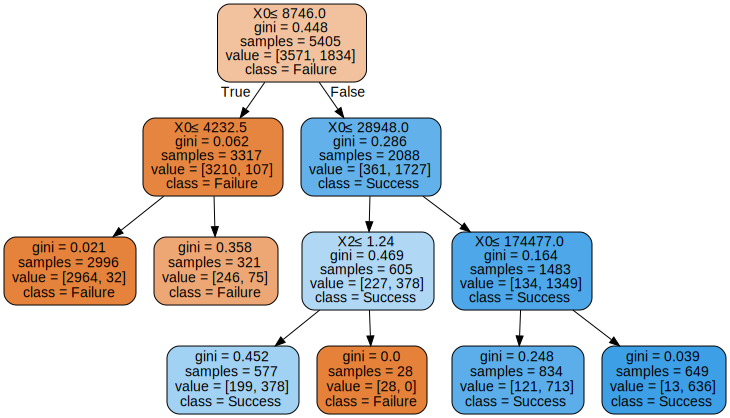

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                     class_names=['Failure', 'Success'],  
                     filled=True, rounded=True,  
                     special_characters=True)
  
graph1 = graphviz.Source(dot_data, format="png")
graph1

In [ ]:
# graph = graphviz.Source(dot_data)  
# graph.render("google_app")
# files.download('google_app.pdf')

In [ ]:
# import IPython, re
# IPython.display.display(graphviz.Source(re.sub('Tree {',f'Tree {{ size={9}; ratio={0.5}',dot_data)))

### **Naive Bayes**

In [ ]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
NBmodel.score(X_train,y_train)
NB_y_pred = NBmodel.predict(X_test)


In [ ]:
NB_Accuracy = metrics.accuracy_score(y_test, NB_y_pred)
print("Accuracy:",NB_Accuracy)

Accuracy: 0.7962883038411739


### **נרמול**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tran = scaler.transform(X_train)
X_test_tran = scaler.transform(X_test)

### **KNN**

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=1)
KNN_classifier.fit(X_train_tran, y_train)
y_pred_tran = KNN_classifier.predict(X_test_tran)

In [ ]:
KNN_Accuracy = metrics.accuracy_score(y_test, y_pred_tran)
print("Accuracy:",KNN_Accuracy)

Accuracy: 0.8252050064738886


In [ ]:
# error = []
# for i in range(1, 30):
#   knn = KNeighborsClassifier(n_neighbors=i)
#   knn.fit(X_train_tran, y_train)
#   pred_i = knn.predict(X_test_tran)
#   error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

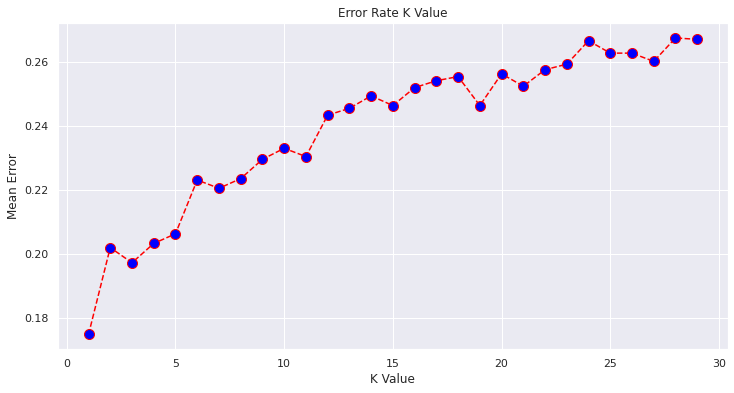

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

### **Random Forest**

In [ ]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
RF_y_pred = RFmodel.predict(X_test)

In [ ]:
RF_Accuracy = metrics.accuracy_score(y_test, RF_y_pred)
print("Accuracy:",RF_Accuracy)

Accuracy: 0.918429003021148


### **ROC**

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
DT_probs = clf.predict_proba(X_test)
DT_probs = DT_probs[:, 1]
DT_auc = roc_auc_score(y_test, DT_probs)
print('AUC: %.2f' % DT_auc)

AUC: 0.96


In [ ]:
DTfpr, DTtpr, DTthresholds = roc_curve(y_test, DT_probs)

In [ ]:
NB_probs = NBmodel.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
NB_auc = roc_auc_score(y_test, NB_probs)
print('AUC: %.2f' % NB_auc)

AUC: 0.87


In [ ]:
NBfpr, NBtpr, NBthresholds = roc_curve(y_test, NB_probs)

In [ ]:
KNN_probs = KNN_classifier.predict_proba(X_test_tran)
KNN_probs = KNN_probs[:, 1]
KNN_auc = roc_auc_score(y_test, KNN_probs)
print('AUC: %.2f' % KNN_auc)

AUC: 0.80


In [ ]:
KNNfpr, KNNtpr, KNNthresholds = roc_curve(y_test, KNN_probs)

In [ ]:
RF_probs = RFmodel.predict_proba(X_test)
RF_probs = RF_probs[:, 1]
RF_auc = roc_auc_score(y_test, RF_probs)
print('AUC: %.2f' % RF_auc)

AUC: 0.97


In [ ]:
RFfpr, RFtpr, RFthresholds = roc_curve(y_test, RF_probs)

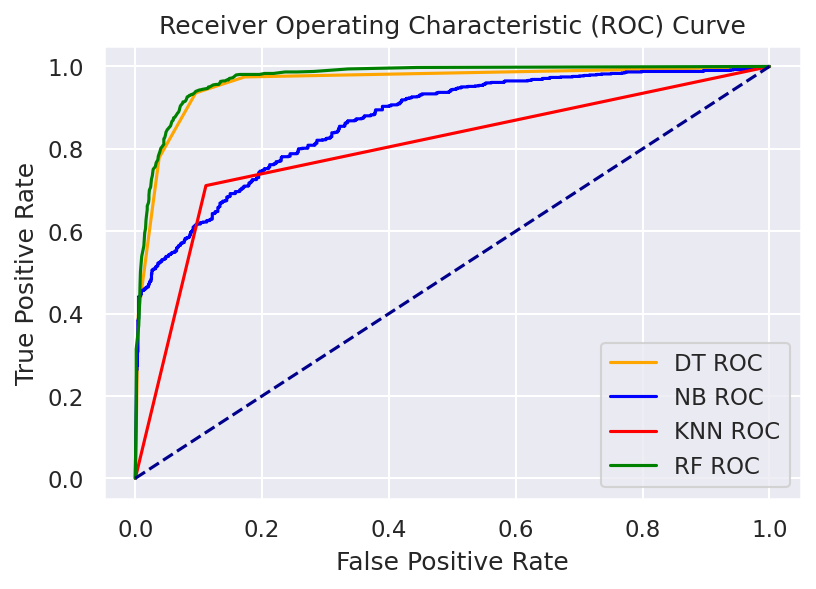

In [ ]:
plt.figure(dpi=150)
plt.plot(DTfpr, DTtpr, color='orange', label='DT ROC')
plt.plot(NBfpr, NBtpr, color='blue', label='NB ROC')
plt.plot(KNNfpr, KNNtpr, color='red', label='KNN ROC')
plt.plot(RFfpr, RFtpr, color='green', label='RF ROC')


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [ ]:
auc = [DT_auc,NB_auc,KNN_auc, RF_auc]
accuracy = [DT_Accuracy,NB_Accuracy,KNN_Accuracy, RF_Accuracy]
models = ['Decision Tree','Naive Bayes','k-Nearest Neighbors', 'Random Forest']
data = list(zip(models, accuracy,auc))
data.sort(key = lambda t: t[-1],reverse = True)
pd.DataFrame(data = data,columns = ['Models','Accuracy','Auc'])

,Models,Accuracy,Auc
0,Random Forest,0.918429,0.971917
1,Decision Tree,0.915839,0.960076
2,Naive Bayes,0.796288,0.867510
3,k-Nearest Neighbors,0.825205,0.799660
